# Network Analysis Foraging

In [47]:
%matplotlib inline  
# Load the libraries
import glob2, re
import pandas as pd
import numpy as np
from numpy import polyfit
import json
import networkx as nx
import community as comm
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from matplotlib import colors as mcolors
from matplotlib.colors import ListedColormap

import community as comm
from collections import Counter

# Color palette for figures 

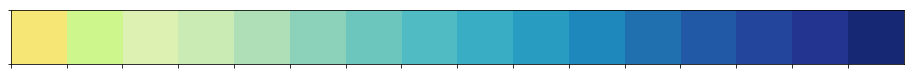

In [30]:
color_map = sns.color_palette("YlGnBu", n_colors=len(ROBOT_RANGE))
color_map = color_map.as_hex()
color_map[0] = '#f5e675'
color_map[1] = '#cdf68d'

#color_map = sns.cubehelix_palette(n_colors=len(ROBOT_RANGE), light=0.7, rot=-0.4)

linestyles = ['-', '--', '-.', ':', '-']
markers=['x', ',', '^', 'o', '.']
loosely_dotted = (0, (5,10))
linestyles = ['solid','dashed','dashdot','dotted',loosely_dotted]
sns.palplot(color_map)

In [5]:
# Specify the search terms for filtering the files
ROBOT_RANGE = range(1,17)
TOKEN_RANGE = range(4,9)
DENSITY_OF_TOKENS = '\d'
TIMEOUT_THRESHOLD = 21000

In [34]:
%store -r SIMULATION_FORAGING_GR
%store -r SIMULATION_FORAGING_FINISHING_TIMES

In [66]:
densities = [[[] for i in range(len(TOKEN_RANGE))] for i in range(len(ROBOT_RANGE))]
av_path = [[[] for i in range(len(TOKEN_RANGE))] for i in range(len(ROBOT_RANGE))]
betweenness = [[[] for i in range(len(TOKEN_RANGE))] for i in range(len(ROBOT_RANGE))]
pg_rank = [[[] for i in range(len(TOKEN_RANGE))] for i in range(len(ROBOT_RANGE))]
hits = [[[] for i in range(len(TOKEN_RANGE))] for i in range(len(ROBOT_RANGE))]
comm_ids = [[[] for i in range(len(TOKEN_RANGE))] for i in range(len(ROBOT_RANGE))]

for x, NUMBER_OF_ROBOTS in enumerate(ROBOT_RANGE):
    for y, NUMBER_OF_TOKENS in enumerate(TOKEN_RANGE):
        densities[x][y] = [nx.density(i) for i in SIMULATION_FORAGING_GR[x][y] if i!= None]
        av_path[x][y] = [nx.average_shortest_path_length(i) for i in SIMULATION_FORAGING_GR[x][y] if (not nx.is_empty(i)) and (nx.is_weakly_connected(i))]
        betweenness[x][y] = [nx.betweenness_centrality(i) for i in SIMULATION_FORAGING_GR[x][y] if not nx.is_empty(i)]
        pg_rank[x][y] = [nx.pagerank(i) for i in SIMULATION_FORAGING_GR[x][y] if not nx.is_empty(i)]
        #hits[x][y] = [nx.hits(i) for i in SIMULATION_FORAGING_GR[x][y] if not nx.is_empty(i)]
        comm_ids[x][y] = [comm.best_partition(i.to_undirected()) for i in SIMULATION_FORAGING_GR[x][y] if not nx.is_empty(i)] 

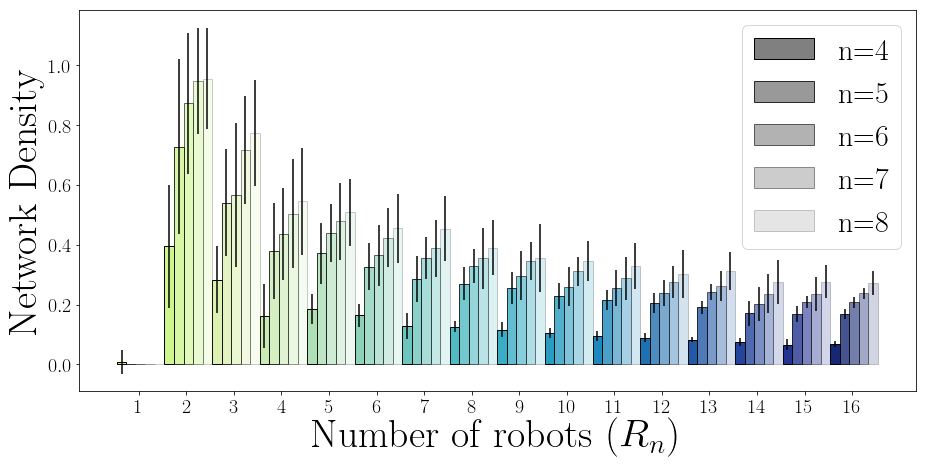

In [33]:
# Finishing Time Calculation
plt.figure(figsize=(15,7))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

bar_width = 0.2
opacity = 0.4

for y, NUMBER_OF_TOKENS in enumerate(TOKEN_RANGE):
    robot_array =[d2[y] for d2 in [d1[:] for d1 in densities]]
    rr = np.array(ROBOT_RANGE)
    plt.bar(rr+(bar_width*y), map(np.nanmean, zip(robot_array)), bar_width, yerr=map(np.nanstd, zip(robot_array)), label='n='+str(NUMBER_OF_TOKENS), color=color_map,  edgecolor='k', lw=1, alpha=1-(y*0.2))
    plt.legend(loc=1, prop={'size': 30})
    
ax = plt.gca()
leg = ax.get_legend()
for y, NUMBER_OF_TOKENS in enumerate(TOKEN_RANGE):
    leg.legendHandles[y].set_color('grey')
    leg.legendHandles[y].set_edgecolor('black')    
   
plt.tick_params(labelsize=20)
plt.xticks(rr+0.36, tuple((i) for i in ROBOT_RANGE))
plt.xlabel('Number of robots' + ' ' +  r'$(R_{n})$' , fontsize=40)
plt.ylabel('Network Density', fontsize=40)
plt.show()

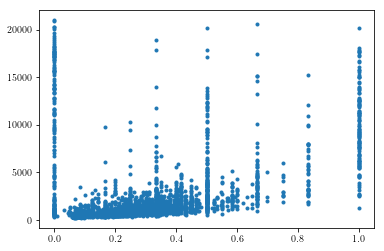

In [37]:
network_density = []
finishing_times = []

for x, NUMBER_OF_ROBOTS in enumerate(ROBOT_RANGE):
    for y, NUMBER_OF_TOKENS in enumerate(TOKEN_RANGE):
        for i in xrange(35):
            network_density.append(densities[x][y][i])
            finishing_times.append(SIMULATION_FORAGING_FINISHING_TIMES[x][y][i])

b, m = polyfit(network_density, finishing_times, 1)

x = network_density
y = finishing_times

plt.plot(x, y, '.')
plt.plot(x, b + m * np.array(x), '-')  

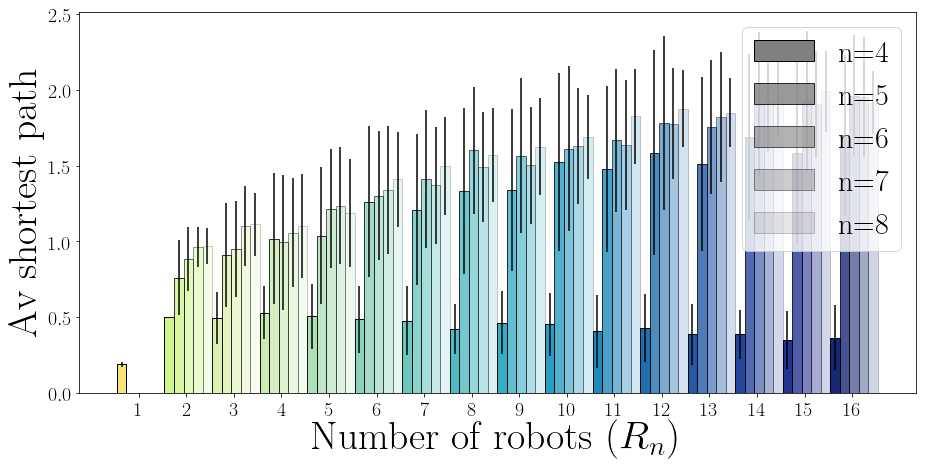

In [53]:
# Finishing Time Calculation
plt.figure(figsize=(15,7))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

bar_width = 0.2
opacity = 0.4

for y, NUMBER_OF_TOKENS in enumerate(TOKEN_RANGE):
    robot_array =[d2[y] for d2 in [d1[:] for d1 in av_path]]
    rr = np.array(ROBOT_RANGE)
    plt.bar(rr+(bar_width*y), map(np.mean, zip(robot_array)), bar_width, yerr=map(np.std, zip(robot_array)), label='n='+str(NUMBER_OF_TOKENS), color=color_map,  edgecolor='k', lw=1, alpha=1-(y*0.2))
    plt.legend(loc=1, prop={'size': 30})
   
ax = plt.gca()
leg = ax.get_legend()
for y, NUMBER_OF_TOKENS in enumerate(TOKEN_RANGE):
    leg.legendHandles[y].set_color('grey')
    leg.legendHandles[y].set_edgecolor('black')    

plt.tick_params(labelsize=20)
plt.xticks(rr+0.36, tuple((i) for i in ROBOT_RANGE))
plt.xlabel('Number of robots' + ' ' +  r'$(R_{n})$' , fontsize=40)
plt.ylabel('Av shortest path', fontsize=40)
plt.show()

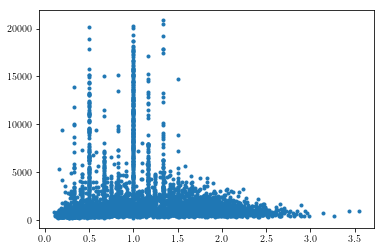

In [45]:
av_shortest_path = []
finishing_times = []

for x, NUMBER_OF_ROBOTS in enumerate(ROBOT_RANGE):
    for y, NUMBER_OF_TOKENS in enumerate(TOKEN_RANGE):
        for i in xrange(len(av_path[x][y])):
            av_shortest_path.append(av_path[x][y][i])
            finishing_times.append(SIMULATION_FORAGING_FINISHING_TIMES[x][y][i])

b, m = polyfit(av_shortest_path, finishing_times, 1)

x = av_shortest_path
y = finishing_times

plt.plot(x, y, '.')
plt.plot(x, b + m * np.array(x), '-')  

In [48]:
communities_size = [[[] for i in range(len(TOKEN_RANGE))] for i in range(len(ROBOT_RANGE))]

for x, NUMBER_OF_ROBOTS in enumerate(ROBOT_RANGE):
    for y, NUMBER_OF_TOKENS in enumerate(TOKEN_RANGE):
         communities_size[x][y] = [np.mean(Counter(i.values()).values()) for i in comm_ids[x][y]]

In [132]:
communities_size = [[[] for i in range(len(TOKEN_RANGE))] for i in range(len(ROBOT_RANGE))]

for x, NUMBER_OF_ROBOTS in enumerate(ROBOT_RANGE):
    for y, NUMBER_OF_TOKENS in enumerate(TOKEN_RANGE):
         communities_size[x][y] = [len(Counter(i.values())) for i in comm_ids[x][y]]

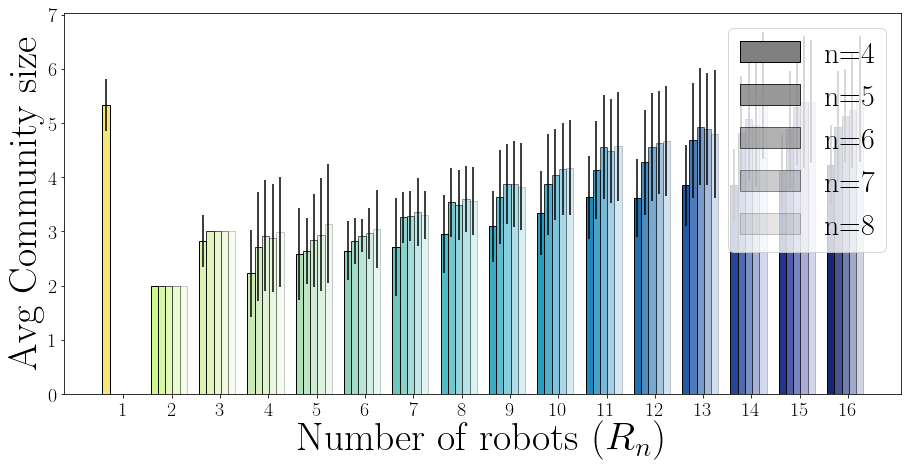

In [59]:
# Finishing Time Calculation
plt.figure(figsize=(15,7))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

bar_width = 0.15
opacity = 0.4

for y, NUMBER_OF_TOKENS in enumerate(TOKEN_RANGE):
    robot_array =[d2[y] for d2 in [d1[:] for d1 in communities_size]]
    rr = np.array(ROBOT_RANGE)
    plt.bar(rr+(bar_width*y), map(np.mean, zip(robot_array)), bar_width, yerr=map(np.std, zip(robot_array)),  label='n='+str(NUMBER_OF_TOKENS), color=color_map,  edgecolor='k', lw=1, alpha=1-(y*0.2))
    plt.legend(loc=1, prop={'size': 30})

ax = plt.gca()
leg = ax.get_legend()
for y, NUMBER_OF_TOKENS in enumerate(TOKEN_RANGE):
    leg.legendHandles[y].set_color('grey')
    leg.legendHandles[y].set_edgecolor('black')    
    
    
plt.tick_params(labelsize=20)
plt.xticks(rr+0.36, tuple((i) for i in ROBOT_RANGE))
plt.xlabel('Number of robots' + ' ' +  r'$(R_{n})$' , fontsize=40)
plt.ylabel('Avg Community size', fontsize=40)
plt.show()